# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [2]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# with zipfile.ZipFile("/Users/lerfich/Downloads/archive.zip") as z:
#     with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
#         df = pd.read_csv(f, parse_dates=["dt"])

df = pd.read_csv('/Users/lerfich/Downloads/archive/GlobalLandTemperaturesByMajorCity.csv', parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [3]:
df = df[df['dt'] >= '1950-01-01'].reset_index(drop=True)

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

/var/folders/rm/syy2v85514n352llwkjcj9g00000gn/T/ipykernel_88945/3405205512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Toronto_df['Year'] = Toronto_df['dt'].dt.year
/var/folders/rm/syy2v85514n352llwkjcj9g00000gn/T/ipykernel_88945/3405205512.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Toronto_Average_tmp = Toronto_df.groupby('Year', as_index=False).mean()


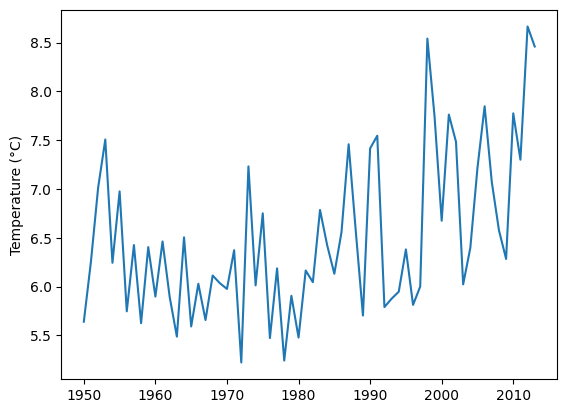

In [71]:
Toronto_df = df[df['City'] == 'Toronto']

Toronto_df['Year'] = Toronto_df['dt'].dt.year

Toronto_df = Toronto_df.reset_index(drop=True)

Toronto_df.head()

Toronto_Average_tmp = Toronto_df.groupby('Year', as_index=False).mean()
Toronto_Average_tmp.head(20)

plt.plot(Toronto_Average_tmp['Year'], Toronto_Average_tmp['AverageTemperature'])
plt.ylabel('Temperature (°C)')
plt.show()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [111]:
df_cities_with_variance = df.groupby('City', as_index=False)['AverageTemperature'].var()

df_cities_with_variance.max()

200

# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

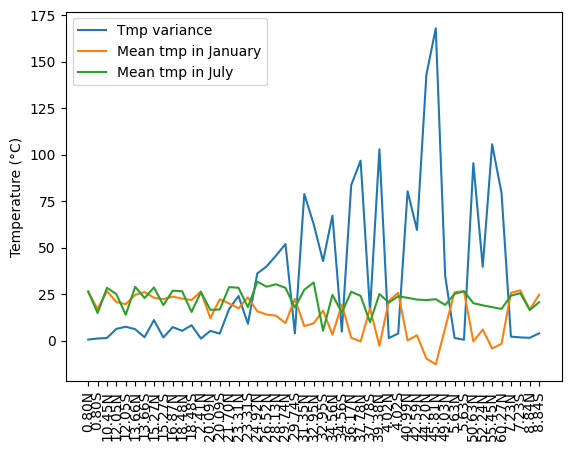

In [153]:
grouped_latitude_variance = df.groupby('Latitude', as_index=False)['AverageTemperature'].var()

temperature_in_January1975 = df[df['dt'] == '1975-01-01'].groupby('Latitude', as_index=False)['AverageTemperature'].mean()

temperature_in_July1975 = df[df['dt'] == '1975-07-01'].groupby('Latitude', as_index=False)['AverageTemperature'].mean()

plt.plot(grouped_latitude_variance['Latitude'], grouped_latitude_variance['AverageTemperature'], label='Tmp variance')
plt.plot(temperature_in_January1975['Latitude'], temperature_in_January1975['AverageTemperature'], label='Mean tmp in January')
plt.plot(temperature_in_July1975['Latitude'], temperature_in_July1975['AverageTemperature'], label='Mean tmp in July')
plt.xticks(rotation=90)
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

/var/folders/rm/syy2v85514n352llwkjcj9g00000gn/T/ipykernel_72086/2268745971.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  St_P_df = St_P_df.groupby('Year', as_index=False).mean()


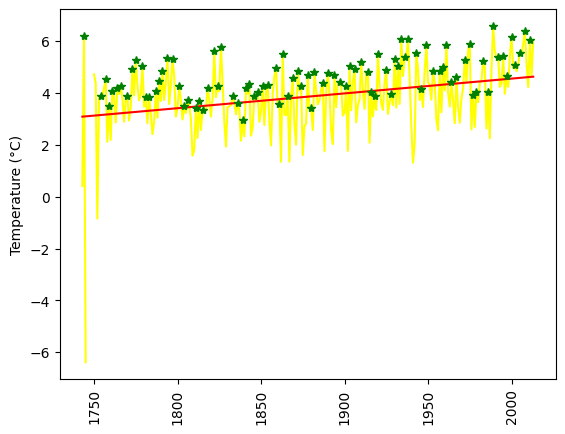

In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression

def cool_years(some_iterable):
    result = []
    for i in range(1, len(some_iterable) - 1):
        if (some_iterable[i] > some_iterable[i-1] and some_iterable[i] > some_iterable[i+1]):
            result.append(i)
    return result    

St_P_df = df[df['City'] == 'Saint Petersburg'].reset_index(drop=True)

St_P_df['Year'] = St_P_df['dt'].dt.year

St_P_df = St_P_df.groupby('Year', as_index=False).mean()
Cool_years = cool_years(St_P_df['AverageTemperature'])

St_P_df_without_NA = St_P_df.dropna()

X = np.array(St_P_df_without_NA['Year']).reshape(-1, 1)
y = np.array(St_P_df_without_NA['AverageTemperature']).reshape(-1, 1)

model = LinearRegression().fit(X, y)
model.score(X, y)
Predicted_temp = model.predict(X)

plt.plot(St_P_df['Year'], St_P_df['AverageTemperature'], 'yellow')
plt.plot(X, Predicted_temp, 'red')
plt.plot(St_P_df[St_P_df.index.isin(Cool_years)]['Year'], St_P_df[St_P_df.index.isin(Cool_years)]['AverageTemperature'], 'g*')
plt.xticks(rotation=90)
plt.ylabel('Temperature (°C)')
plt.show()



# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев со средней отрицательной температурой в году.

In [163]:
import numpy as np

dfy = df
dfm = df
dfy['Year'] = df['dt'].dt.year
dfm['Month'] = df['dt'].dt.month


def find_largest_difference_perYear():
    near_df = df.dropna()
    near_df['Year'] = near_df['dt'].dt.year

    near_df = near_df.groupby(["City", "Year"]).agg({
    "AverageTemperature": "mean",
    }).reset_index().groupby(["City", "Year"]).mean()
    avg_temperature_groupedByCity = near_df.reset_index().reset_index(drop=True).groupby("City")["AverageTemperature"] #.loc[:, ("City", "AverageTemperature", "Year")]
    cities_min_tmp_per_year = avg_temperature_groupedByCity.min()
    cities_max_tmp_per_year = avg_temperature_groupedByCity.max()
    return (cities_max_tmp_per_year - cities_min_tmp_per_year).idxmax() 
print(find_largest_difference_perYear()) #1 подзадание


def find_largest_difference_betweenJanuaryAndJuly():
    near_df = df.dropna()
    near_df['Year'] = near_df['dt'].dt.year
    near_df['Month'] = near_df['dt'].dt.month

    All_City_Julys_Temperatures = near_df[near_df["Month"] == 7].reset_index(drop=True) #закрепили данные за все июли с индексом от 0
    All_City_January_Temperatures = near_df[near_df["Month"] == 1].reset_index(drop=True) #аналогично с январем
    All_City_JulyAndJanuary_Diffrences_Temperatures = All_City_Julys_Temperatures.AverageTemperature - All_City_January_Temperatures.reset_index(drop=True).AverageTemperature #посчитали все разницы
    return All_City_Julys_Temperatures.City[All_City_JulyAndJanuary_Diffrences_Temperatures.idxmax()] #взяли массив соответственных городов (64 года на 100 городов = 6400 соответственных записей) и обратились к нужному
print(find_largest_difference_betweenJanuaryAndJuly()) #2 подзадание


def find_largest_difference_perYear_custom():
    near_df = df.dropna()
    near_df['Year'] = near_df['dt'].dt.year

    Negative_Average_Temperatures = pd.Series(near_df.AverageTemperature < 0, name='Is temperature negative') #добавили столбик с True/False если месяц с отрицательное температурой
    near_df_with_negative_tmp_flag = pd.concat([near_df, Negative_Average_Temperatures], axis=1) #приписали к таблице
    near_df_with_negative_tmp_flag = near_df_with_negative_tmp_flag.groupby(["City", "Year"]).agg({"Is temperature negative": "mean"}).groupby("City").mean() #нашли среднее количество таких месяцев для каждого города
    return near_df_with_negative_tmp_flag.idxmax()[0] #нашли город у наибольшего такого
print(find_largest_difference_perYear_custom()) #3 подзадание

    

Mashhad
Harbin
Harbin


/var/folders/rm/syy2v85514n352llwkjcj9g00000gn/T/ipykernel_92379/2913748103.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  near_df['Year'] = near_df['dt'].dt.year
/var/folders/rm/syy2v85514n352llwkjcj9g00000gn/T/ipykernel_92379/2913748103.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  near_df['Year'] = near_df['dt'].dt.year
/var/folders/rm/syy2v85514n352llwkjcj9g00000gn/T/ipykernel_92379/2913748103.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 

In [50]:
import geopandas
import folium
import numpy as np
import pwlf

map = folium.Map(location=[4, 10], tiles="Stamen Terrain", zoom_start=3)

def map_on_average_temp_in_10_Years():
    near_df = df[df['dt'] >= '2003-01-01'].dropna()

    near_df['Year'] = near_df['dt'].dt.year

    near_df['Latitude'] = near_df.Latitude.str[:-1].dropna()
    near_df['Longitude'] = near_df.Longitude.str[:-1].dropna()

    dff = near_df.groupby(["City", "Year", "Longitude", "Latitude"]).agg({
    "AverageTemperature": "mean",
    }).reset_index().groupby(["City", "Longitude", "Latitude"]).mean()

    dff = dff.reset_index().reset_index(drop=True).loc[:, ("City", "Latitude", "Longitude", "AverageTemperature")]

    geometry = geopandas.points_from_xy(dff.Longitude, dff.Latitude)

    geo_df = geopandas.GeoDataFrame(
        dff[["City", "Latitude", "Longitude", "AverageTemperature"]], geometry=geometry
    )

    world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

    # fig, ax = plt.subplots(figsize=(24, 18))
    # world.plot(ax=ax, alpha=0.4, color="grey")
    # geo_df.plot(column="AverageTemperature", ax=ax, legend=True)
    # plt.title("Temperatures")

    geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

    i = 0
    for coordinates in geo_df_list:
        if geo_df.AverageTemperature[i] >= 22: 
            type_color = "red"
        elif geo_df.AverageTemperature[i] >= 16: 
            type_color = "orange"
        elif geo_df.AverageTemperature[i] >= 12: 
            type_color = "green"
        elif geo_df.AverageTemperature[i] >= 8: 
            type_color = "blue"
        else:
            type_color = "purple"

        map.add_child(
            folium.Marker(
                location=coordinates,
                popup="City: " + str(geo_df.City[i]) + "<br>"
                    + "Average Temperature: " + str(geo_df.AverageTemperature[i]) + "<br>"
                    + "Coordinates: " + str(geo_df_list[i]),
                icon=folium.Icon(color="%s" % type_color),
            )
        )
        i = i + 1

def map_on_linear_regression_coefs():
    ddf = df[df['dt'] >= '1950-01-01'].dropna()

    ddf['Year'] = ddf['dt'].dt.year

    ddf['Latitude'] = ddf.Latitude.str[:-1].dropna()
    ddf['Longitude'] = ddf.Longitude.str[:-1].dropna()

    dff = ddf.groupby(["City", "Year", "Longitude", "Latitude"]).agg({
    "AverageTemperature": "mean",
    }).reset_index()

    Years = np.array(dff.groupby('City')["Year"].unique())
    AvgTmps = np.array(dff.groupby('City')['AverageTemperature'])

    model_coefs = [] #для второго пункта
    for cityIndex in range(0, Years.size):
        X = np.split(Years[cityIndex], 64)
        y = np.split(AvgTmps[cityIndex][1], 64)
        model = LinearRegression().fit(X, y)
        # model.score(X, y)
        model_coefs.append(model.coef_[0][0]*1000)


    # print(np.array(model_coefs).mean(), 'mean')  #min=5, mean=16, max=35
    default_df = dff.groupby(["City", "Longitude", "Latitude"]).mean().reset_index().reset_index(drop=True).loc[:, ("City", "Latitude", "Longitude", "AverageTemperature")]
    linear_regression_coefs = pd.DataFrame(np.array(model_coefs), columns=["LR Coeficient"])
    default_df = pd.concat([linear_regression_coefs, default_df], axis=1)

    geometry = geopandas.points_from_xy(default_df.Longitude, default_df.Latitude)

    geo_df = geopandas.GeoDataFrame(
        default_df[["City", "Latitude", "Longitude", "AverageTemperature", "LR Coeficient"]], geometry=geometry
    )

    world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
    geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

    i = 0
    for coordinates in geo_df_list:
        if geo_df["LR Coeficient"][i] >= 30:
            type_color = "red"
        elif geo_df["LR Coeficient"][i] >= 25: 
            type_color = "orange"
        elif geo_df["LR Coeficient"][i] >= 20: 
            type_color = "green"
        elif geo_df["LR Coeficient"][i] >= 10:
            type_color = "blue"
        else:
            type_color = "purple"

        map.add_child(
            folium.Marker(
                location=coordinates,
                popup="City: " + str(geo_df.City[i]) + "<br>"
                    + "Average Temperature: " + str(geo_df.AverageTemperature[i]) + "<br>"
                    + "Linear Regression Coefficient: " + str(geo_df["LR Coeficient"][i]) + "<br>"
                    + "Coordinates: " + str(geo_df_list[i]),
                icon=folium.Icon(color="%s" % type_color),
            )
        )
        i = i + 1

def pwlf_segments():
    ddf = df[df['dt'] >= '1950-01-01'].dropna()

    ddf['Year'] = ddf['dt'].dt.year

    ddf['Latitude'] = ddf.Latitude.str[:-1].dropna()
    ddf['Longitude'] = ddf.Longitude.str[:-1].dropna()

    dff = ddf.groupby(["City", "Year", "Longitude", "Latitude"]).agg({
    "AverageTemperature": "mean",
    }).reset_index()

    Years = np.array(dff.groupby('City')["Year"].unique())
    AvgTmps = np.array(dff.groupby('City')['AverageTemperature'])

    model_coefs = []
    for cityIndex in range(0, Years.size):
        X = Years[cityIndex]
        y = AvgTmps[cityIndex][1]
        x0 = np.array([min(X), 1960, 1988, 2001, max(X)])
        n_segments = 3
        my_pwlf = pwlf.PiecewiseLinFit(X, y)
        my_pwlf.fit(n_segments)
        model_coefs.append(my_pwlf.calc_slopes()[n_segments-1]*1000) #анализируем коэффициент угла наклона прямой последнего сегмента
        # xHat = np.linspace(min(X), max(X), num=10000)
        # yHat = my_pwlf.predict(xHat)
        # plt.figure()
        # plt.plot(X, y, 'o')
        # plt.plot(xHat, yHat, '-')
        # plt.show()      


    # print(np.array(model_coefs).min(),np.array(model_coefs).mean(), np.array(model_coefs).max()) 
    #для 2 сегментов -18808.36001945957 565.9038612395512 25086.07784515764; 
    #для 4 сегментов  -777.629152971899 587.8747184280812 10146.2495414308;
    #для 6 сегментов -22985.749940680977 655.4577508776075 22440.348576947217


    default_df = dff.groupby(["City", "Longitude", "Latitude"]).mean().reset_index().reset_index(drop=True).loc[:, ("City", "Latitude", "Longitude", "AverageTemperature")]
    pwlf_coefs = pd.DataFrame(np.array(model_coefs), columns=["PWLF Coeficient"])
    default_df = pd.concat([pwlf_coefs, default_df], axis=1)

    geometry = geopandas.points_from_xy(default_df.Longitude, default_df.Latitude)

    geo_df = geopandas.GeoDataFrame(
        default_df[["City", "Latitude", "Longitude", "AverageTemperature", "PWLF Coeficient"]], geometry=geometry
    )

    world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_cities"))
    geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

    i = 0
    for coordinates in geo_df_list:
        if geo_df["PWLF Coeficient"][i] >= 2000:
            type_color = "red"
        elif geo_df["PWLF Coeficient"][i] >= 500: 
            type_color = "orange"
        elif geo_df["PWLF Coeficient"][i] >= 0: 
            type_color = "green"
        elif geo_df["PWLF Coeficient"][i] >= -500:
            type_color = "blue"
        else:
            type_color = "purple"

        map.add_child(
            folium.Marker(
                location=coordinates,
                popup="City: " + str(geo_df.City[i]) + "<br>"
                    + "Average Temperature: " + str(geo_df.AverageTemperature[i]) + "<br>"
                    + "Piecewise Linear Functions last segment coefficient: " + str(geo_df["PWLF Coeficient"][i]) + "<br>"
                    + "Coordinates: " + str(geo_df_list[i]),
                icon=folium.Icon(color="%s" % type_color),
            )
        )
        i = i + 1


#### ЗАПУСТИТЬ ОДНУ ИЗ ЭТИХ ТРЕХ ФУНКЦИЙ #####
##############################################
map_on_average_temp_in_10_Years()
# map_on_linear_regression_coefs_in_15_Years()
# pwlf_segments()
###############################################
###############################################


map #у некоторых городов типа Чикаго неправильные координаты, поэтому находится около Индии



/var/folders/rm/syy2v85514n352llwkjcj9g00000gn/T/ipykernel_8852/3599198672.py:139: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  AvgTmps = np.array(dff.groupby('City')['AverageTemperature'])


-848.70218504624 642.8248596967735 11319.075258270619


# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*

https://github.com/lerfich/python-project-task-3.8